In [24]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Data Generation

In [ ]:
contamination = .15
X_train, X_test, y_train, y_test = generate_data(n_train = 300, n_test = 200, n_features = 3, contamination = contamination, random_state = 42)

OCSVM_LIN

In [50]:
ocsvm_lin = OCSVM(kernel = 'linear', contamination = contamination)
ocsvm_lin.fit(X_train)

y_train_pred_lin = ocsvm_lin.predict(X_train)
y_test_pred_lin = ocsvm_lin.predict(X_test)

y_test_scores_lin = ocsvm_lin.decision_function(X_test)

y_true_lin = np.array(y_test).ravel()
y_pred_lin = np.array(y_test_pred_lin).ravel()

roc_auc_lin = roc_auc_score(y_true=y_test, y_score=y_test_scores_lin.ravel())
bal_acc_lin = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_lin)

print("ROC_AUC SCORE FOR OCSVM_LIN: ", roc_auc_lin)
print("BAL_ACC SCORE FOR OCSVM_LIN: ", bal_acc_lin)

ROC_AUC SCORE FOR OCSVM_LIN:  1.0
BAL_ACC SCORE FOR OCSVM_LIN:  0.9833333333333334


OCSVM_LIN Plots

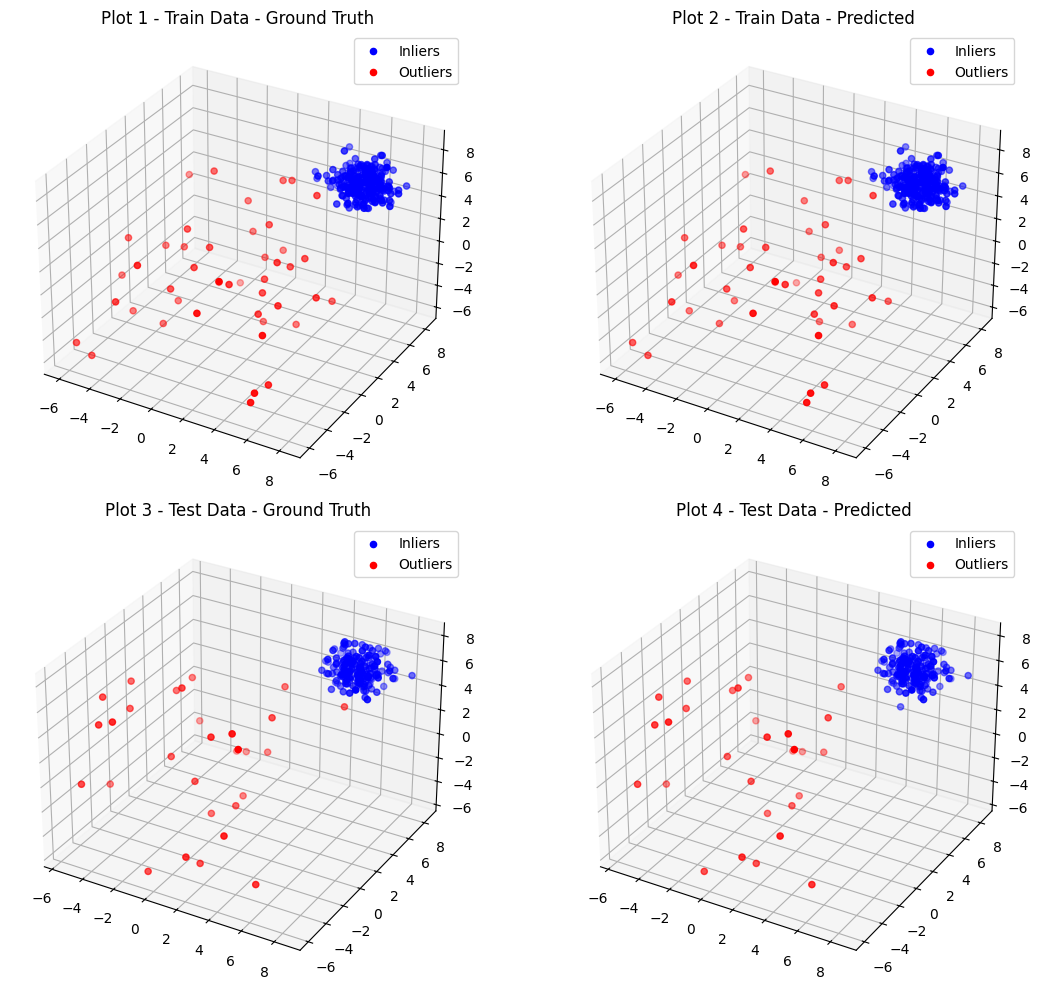

In [51]:
fig = plt.figure(figsize=(12, 10))

# Plot 1: Training Data - Ground Truth
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], X_train[y_train == 0, 2], c='blue', label='Inliers')
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], X_train[y_train == 1, 2], c='red', label='Outliers')
ax1.set_title('Plot 1 - Train Data - Ground Truth')
ax1.legend()

# Plot 2: Training Data - Predicted
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(X_train[y_train_pred_lin == 0, 0], X_train[y_train_pred_lin == 0, 1], X_train[y_train_pred_lin == 0, 2], c='blue', label='Inliers')
ax2.scatter(X_train[y_train_pred_lin == 1, 0], X_train[y_train_pred_lin == 1, 1], X_train[y_train_pred_lin == 1, 2], c='red', label='Outliers')
ax2.set_title('Plot 2 - Train Data - Predicted')
ax2.legend()

# Plot 3: Test Data - Ground Truth
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], X_test[y_test == 0, 2], c='blue', label='Inliers')
ax3.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='red', label='Outliers')
ax3.set_title('Plot 3 - Test Data - Ground Truth')
ax3.legend()

# Plot 4: Test Data - Predicted
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(X_test[y_pred_lin == 0, 0], X_test[y_pred_lin == 0, 1], X_test[y_pred_lin == 0, 2], c='blue', label='Inliers')
ax4.scatter(X_test[y_pred_lin == 1, 0], X_test[y_pred_lin == 1, 1], X_test[y_pred_lin == 1, 2], c='red', label='Outliers')
ax4.set_title('Plot 4 - Test Data - Predicted')
ax4.legend()

plt.tight_layout()
plt.show()

OCSVM_RBF with Plots

ROC_AUC SCORE FOR OCSVM_RBF:  0.9998039215686275
BAL_ACC SCORE FOR OCSVM_RBF:  0.9803921568627452


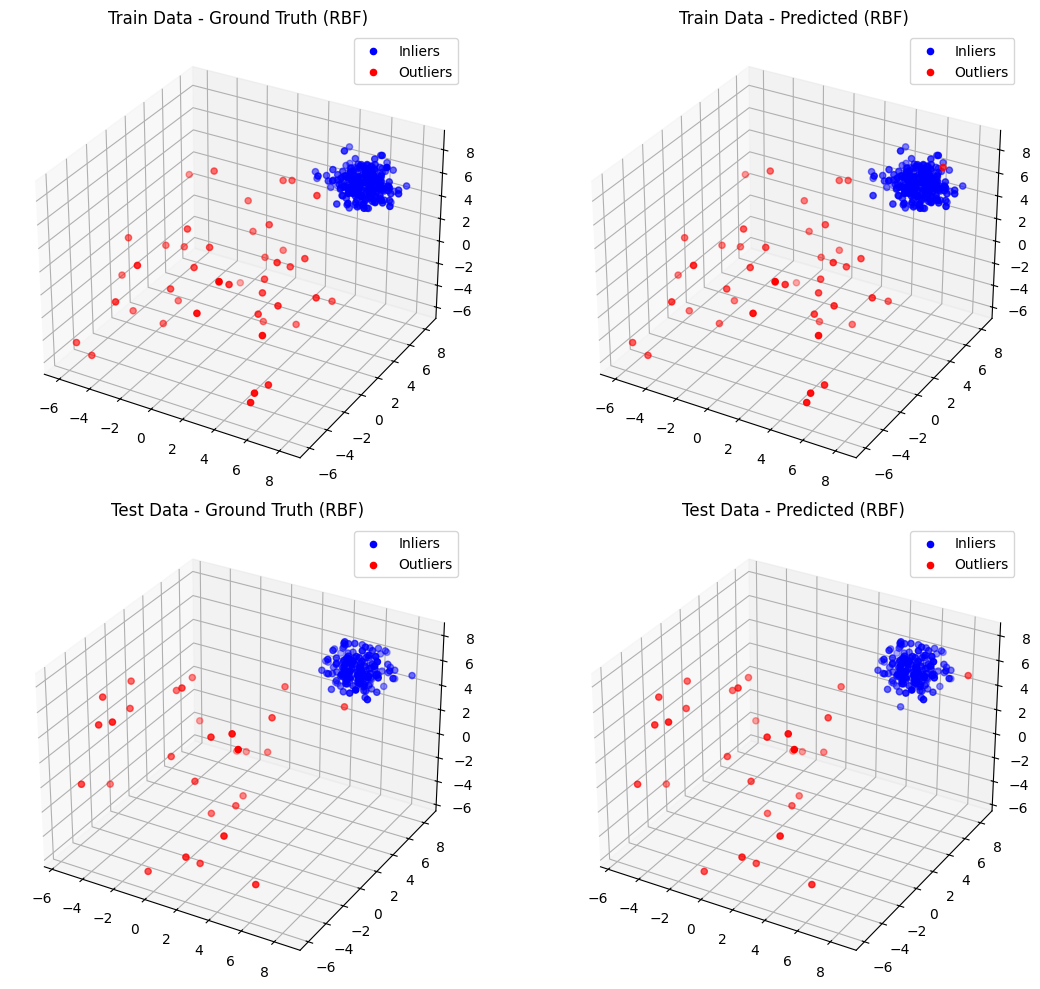

In [53]:
ocsvm_rbf = OCSVM(kernel = 'rbf', contamination = contamination)
ocsvm_rbf.fit(X_train)

y_train_pred_rbf = ocsvm_rbf.predict(X_train)
y_test_pred_rbf = ocsvm_rbf.predict(X_test)

y_test_scores_rbf = ocsvm_rbf.decision_function(X_test)

y_true_rbf = np.array(y_test).ravel()
y_pred_rbf = np.array(y_test_pred_rbf).ravel()

roc_auc_rbf = roc_auc_score(y_true=y_true_rbf, y_score=y_test_scores_rbf.ravel())
bal_acc_rbf = balanced_accuracy_score(y_true=y_true_rbf, y_pred=y_pred_rbf)

print("ROC_AUC SCORE FOR OCSVM_RBF: ", roc_auc_rbf)
print("BAL_ACC SCORE FOR OCSVM_RBF: ", bal_acc_rbf)

fig = plt.figure(figsize=(12, 10))

# Plot 1: Training Data - Ground Truth
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], X_train[y_train == 0, 2], c='blue', label='Inliers')
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], X_train[y_train == 1, 2], c='red', label='Outliers')
ax1.set_title('Train Data - Ground Truth (RBF)')
ax1.legend()

# Plot 2: Training Data - Predicted
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(X_train[y_train_pred_rbf == 0, 0], X_train[y_train_pred_rbf == 0, 1], X_train[y_train_pred_rbf == 0, 2], c='blue', label='Inliers')
ax2.scatter(X_train[y_train_pred_rbf == 1, 0], X_train[y_train_pred_rbf == 1, 1], X_train[y_train_pred_rbf == 1, 2], c='red', label='Outliers')
ax2.set_title('Train Data - Predicted (RBF)')
ax2.legend()

# Plot 3: Test Data - Ground Truth
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], X_test[y_test == 0, 2], c='blue', label='Inliers')
ax3.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='red', label='Outliers')
ax3.set_title('Test Data - Ground Truth (RBF)')
ax3.legend()

# Plot 4: Test Data - Predicted
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(X_test[y_pred_rbf == 0, 0], X_test[y_pred_rbf == 0, 1], X_test[y_pred_rbf == 0, 2], c='blue', label='Inliers')
ax4.scatter(X_test[y_pred_rbf == 1, 0], X_test[y_pred_rbf == 1, 1], X_test[y_pred_rbf == 1, 2], c='red', label='Outliers')
ax4.set_title('Test Data - Predicted (RBF)')
ax4.legend()

plt.tight_layout()
plt.show()

DeepSVDD

Epoch 1/100, Loss: 7.613372564315796
Epoch 2/100, Loss: 7.099010646343231
Epoch 3/100, Loss: 7.139994651079178
Epoch 4/100, Loss: 7.724268764257431
Epoch 5/100, Loss: 7.1583486795425415
Epoch 6/100, Loss: 7.731144890189171
Epoch 7/100, Loss: 7.313276022672653
Epoch 8/100, Loss: 7.029458686709404
Epoch 9/100, Loss: 7.548480987548828
Epoch 10/100, Loss: 7.443401038646698
Epoch 11/100, Loss: 7.948530435562134
Epoch 12/100, Loss: 7.310486525297165
Epoch 13/100, Loss: 7.368755489587784
Epoch 14/100, Loss: 7.0734017342329025
Epoch 15/100, Loss: 7.58994522690773
Epoch 16/100, Loss: 7.169717848300934
Epoch 17/100, Loss: 7.656261444091797
Epoch 18/100, Loss: 7.780419617891312
Epoch 19/100, Loss: 7.727053463459015
Epoch 20/100, Loss: 7.3845930099487305
Epoch 21/100, Loss: 7.2053326070308685
Epoch 22/100, Loss: 7.4190652668476105
Epoch 23/100, Loss: 7.300652384757996
Epoch 24/100, Loss: 7.258310437202454
Epoch 25/100, Loss: 7.664980381727219
Epoch 26/100, Loss: 7.783870309591293
Epoch 27/100, Los

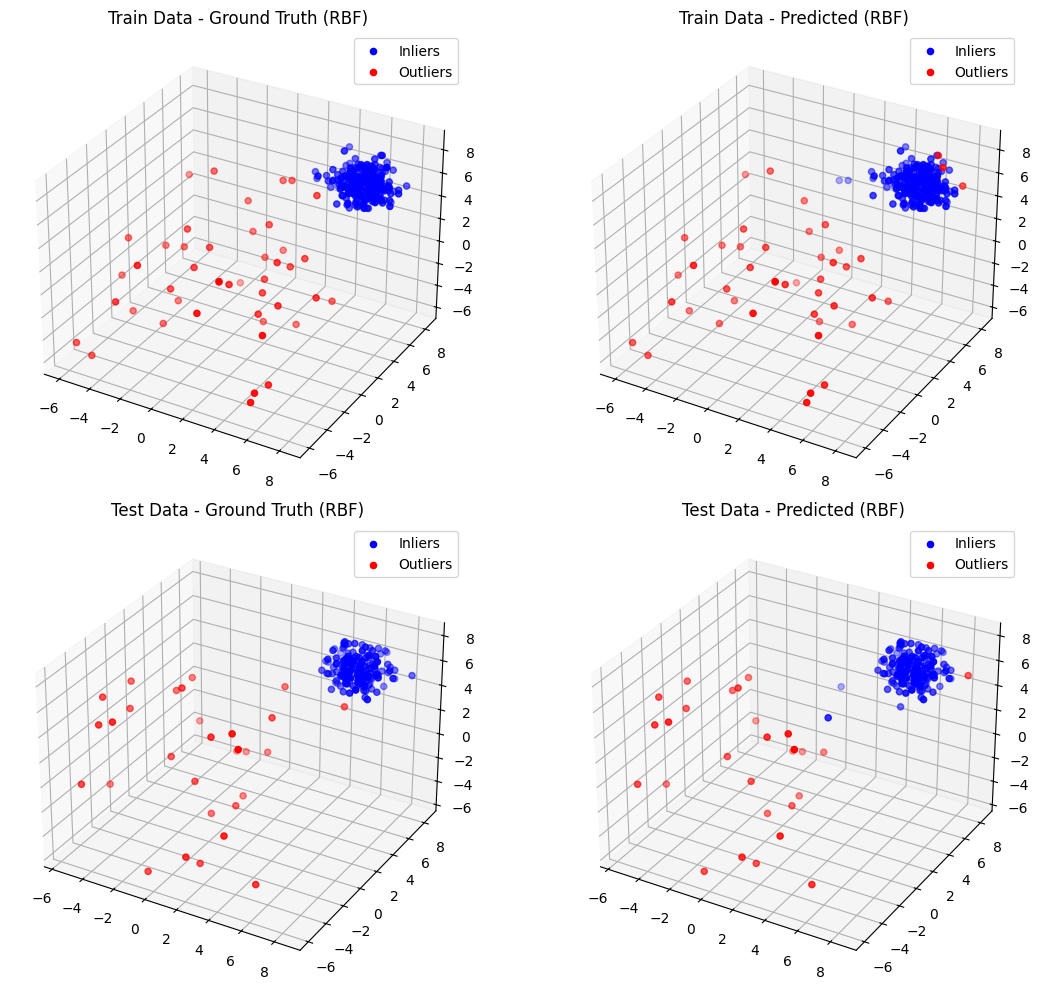

In [55]:
dsvdd = DeepSVDD(n_features=X_train.shape[1], contamination = contamination)
dsvdd.fit(X_train)

y_train_pred_dsvdd = dsvdd.predict(X_train)
y_test_pred_dsvdd = dsvdd.predict(X_test)

y_test_scores_dsvdd = dsvdd.decision_function(X_test)

y_true_dsvdd = np.array(y_test).ravel()
y_pred_dsvdd = np.array(y_test_pred_dsvdd).ravel()

roc_auc_dsvdd = roc_auc_score(y_true=y_true_dsvdd, y_score=y_test_scores_dsvdd.ravel())
bal_acc_dsvdd = balanced_accuracy_score(y_true=y_true_dsvdd, y_pred=y_pred_dsvdd)

print("ROC_AUC SCORE FOR DSVDD: ", roc_auc_dsvdd)
print("BAL_ACC SCORE FOR DSVDD: ", bal_acc_dsvdd)

fig = plt.figure(figsize=(12, 10))

# Plot 1: Training Data - Ground Truth
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], X_train[y_train == 0, 2], c='blue', label='Inliers')
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], X_train[y_train == 1, 2], c='red', label='Outliers')
ax1.set_title('Train Data - Ground Truth (RBF)')
ax1.legend()

# Plot 2: Training Data - Predicted
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.scatter(X_train[y_train_pred_dsvdd == 0, 0], X_train[y_train_pred_dsvdd == 0, 1], X_train[y_train_pred_dsvdd == 0, 2], c='blue', label='Inliers')
ax2.scatter(X_train[y_train_pred_dsvdd == 1, 0], X_train[y_train_pred_dsvdd == 1, 1], X_train[y_train_pred_dsvdd == 1, 2], c='red', label='Outliers')
ax2.set_title('Train Data - Predicted (RBF)')
ax2.legend()

# Plot 3: Test Data - Ground Truth
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], X_test[y_test == 0, 2], c='blue', label='Inliers')
ax3.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='red', label='Outliers')
ax3.set_title('Test Data - Ground Truth (RBF)')
ax3.legend()

# Plot 4: Test Data - Predicted
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(X_test[y_pred_dsvdd == 0, 0], X_test[y_pred_dsvdd == 0, 1], X_test[y_pred_dsvdd == 0, 2], c='blue', label='Inliers')
ax4.scatter(X_test[y_pred_dsvdd == 1, 0], X_test[y_pred_dsvdd == 1, 1], X_test[y_pred_dsvdd == 1, 2], c='red', label='Outliers')
ax4.set_title('Test Data - Predicted (RBF)')
ax4.legend()

plt.tight_layout()
plt.show()